┌ Info: Saved animation to C:\Users\giggl\aizawa_attractor.gif
└ @ Plots C:\Users\giggl\.julia\packages\Plots\9Q9pN\src\animation.jl:156


Plots.AnimatedGif("C:\\Users\\giggl\\aizawa_attractor.gif")
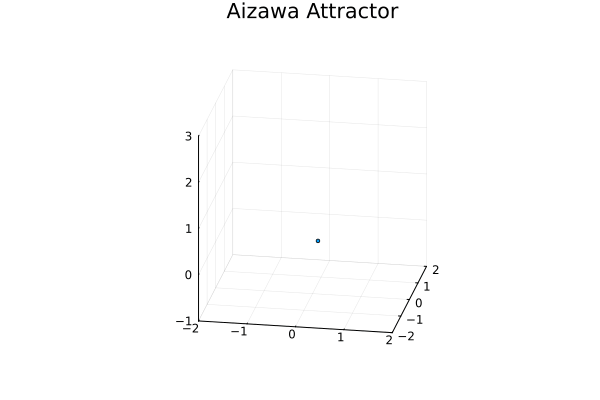

In [1]:
using Plots
gr()

#define the Aizawa Attractor
#keyword def generates a constructor for the AizawaAttractor struct that accepts keyword arguments
#struct is a box that contains different kinds of values
#mutable meaning we can modify it
Base.@kwdef mutable struct AizawaAttractor
    #time step
    dt::Float64= 0.015
    #constants
    a::Float64= 0.95
    b::Float64= 0.7
    c::Float64= 0.6
    d::Float64= 3.5
    e::Float64= 0.25
    #initial conditions
    f::Float64 = 0.1
    x::Float64 = 0.1
    y::Float64 = 0.1
    z::Float64 = 0.1
end
#step! function does two things- calculated dx,dy,dz based on whatever struct weve given it
#2-updates ax, ay, az values for the next iteration
function step!(a::AizawaAttractor)
    #a.z is accessing z from a
    dx = (a.z - a.b) * a.x - a.d*a.y
    dy = a.d*a.x + (a.z - a.b)*a.y
    dz = a.c + a.a * a.z - (a.z)^3 / 3 - ((a.x^2 + a.y^2) * (1 + a.e * a.z) + a.f * a.z^2)
    #updates the x-coordinate of the Aizawa Attractor's position based on the calculated change dx and the time step a.dt
    a.x += a.dt * dx
    #same thing w/ y
    a.y += a.dt*dy
    #same thing w/ z
    a.z += a.dt * dz
end

#assign the struct to attractor
attractor = AizawaAttractor()

#plot3d is an inbuilt func
plt = plot3d(
    1,
    xlim = (-2, 2),
    ylim = (-2, 2),
    zlim = (-1, 3),
    title = "Aizawa Attractor",
    legend = false,
    marker = 2,
    lc = :blue,
    lw = 1,
)

#we take 3000 steps
#capture every 15 iterations
anim = @animate for i = 1:3_000
    step!(attractor)
    #attractor.x takes the x value out of our struct, same w/ y and z
    push!(plt, attractor.x, attractor.y, attractor.z)
    #camera for the rotation
    plot!(plt, camera=(10+0.03*i, 20 + 0.01*i))
end every 15
#generate a gif with 30 frames per second
gif(anim, "aizawa_attractor.gif", fps = 30)

LoadError: type Float64 has no field b